In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


filePath = "/Users/vrindajoshi/Projects/animalCrossing/villagers.json"

data = pd.read_json(filePath)
data.head()

,name,url,alt_name,title_color,text_color,id,image_url,species,personality,gender,...,birthday_day,sign,quote,phrase,clothing,islander,debut,prev_phrases,nh_details,appearances
0,Ace,https://nookipedia.com/wiki/Ace,,,,,https://dodo.ac/np/images/4/4f/Ace_PG.png,Bird,Jock,Male,...,,Pisces,,ace,Spade Shirt,False,DNM,[],None,"[DNM, AC, E_PLUS]"
1,Admiral,https://nookipedia.com/wiki/Admiral,,0ca54a,fffce9,brd06,https://dodo.ac/np/images/e/ed/Admiral_NH.png,Bird,Cranky,Male,...,27,Aquarius,Only quitters give up.,aye aye,Hanten Jacket,False,DNM,[],{'image_url': 'https://dodo.ac/np/images/e/ed/...,"[DNM, AC, E_PLUS, WA, NH]"
2,Agent S,https://nookipedia.com/wiki/Agent_S,,0961f6,fffce9,squ05,https://dodo.ac/np/images/a/a7/Agent_S_NH.png,Squirrel,Peppy,Female,...,2,Cancer,You gotta put the pedal to the metal!,sidekick,No. 2 Shirt,False,E_PLUS,[],{'image_url': 'https://dodo.ac/np/images/a/a7/...,"[E_PLUS, WW, CF, NL, WA, NH, HHD, PC]"
3,Agnes,https://nookipedia.com/wiki/Agnes,,515151,fffce9,pig17,https://dodo.ac/np/images/4/4e/Agnes_NH_Transp...,Pig,Big sister,Female,...,21,Taurus,You reap what you sow.,snuffle,Striped Halter Dress,False,NL,[],{'image_url': 'https://dodo.ac/np/images/4/42/...,"[NL, WA, NH, HHD, PC]"
4,Aisle,https://nookipedia.com/wiki/Aisle,,,,,https://dodo.ac/np/images/2/27/Aisle_DnMe%2B.png,Bear cub,Lazy,Male,...,,Capricorn,,あーあ,Blue Grid Shirt,False,E_PLUS,[],None,[E_PLUS]


In [103]:
selected_cols = ['name','species','personality','gender','birthday_month','birthday_day','sign','quote','phrase','clothing']
new = data[selected_cols]

new.head()

,name,species,personality,gender,birthday_month,birthday_day,sign,quote,phrase,clothing
0,Ace,Bird,Jock,Male,,,Pisces,,ace,Spade Shirt
1,Admiral,Bird,Cranky,Male,January,27,Aquarius,Only quitters give up.,aye aye,Hanten Jacket
2,Agent S,Squirrel,Peppy,Female,July,2,Cancer,You gotta put the pedal to the metal!,sidekick,No. 2 Shirt
3,Agnes,Pig,Big sister,Female,April,21,Taurus,You reap what you sow.,snuffle,Striped Halter Dress
4,Aisle,Bear cub,Lazy,Male,,,Capricorn,,あーあ,Blue Grid Shirt


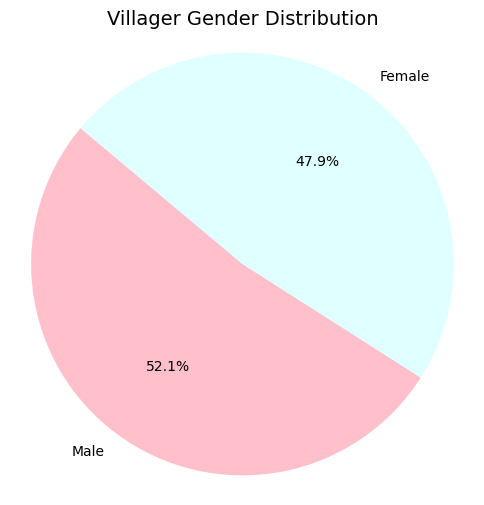

In [104]:
gender_counts = new['gender'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index,autopct='%1.1f%%',startangle=140, colors=['pink','lightcyan'])

plt.title('Villager Gender Distribution',fontsize=14)
plt.axis('equal')
plt.show()

In [105]:
peppy = new[new['personality']=='Peppy']


fem_peppy_count = peppy[peppy['gender']=='Female'].shape[0]
fem_peppy_count

male_peppy_count = peppy[peppy['gender']=='Male'].shape[0]
male_peppy_count

peppy.head()

,name,species,personality,gender,birthday_month,birthday_day,sign,quote,phrase,clothing
2,Agent S,Squirrel,Peppy,Female,July,2,Cancer,You gotta put the pedal to the metal!,sidekick,No. 2 Shirt
10,Anabelle,Anteater,Peppy,Female,February,16,Aquarius,Dance like no one's watching!,snorty,Bold Muumuu
14,Anicotti,Mouse,Peppy,Female,February,24,Pisces,The walls have ears.,cannoli,Colorful Striped Sweater
20,Apple,Hamster,Peppy,Female,September,24,Libra,One rotten apple spoils the barrel.,cheekers,Marble-Dots Tee
22,Audie,Wolf,Peppy,Female,August,31,Virgo,Be the kind of person your future self won't r...,foxtrot,Tropical Muumuu


NameError: name 'b' is not defined

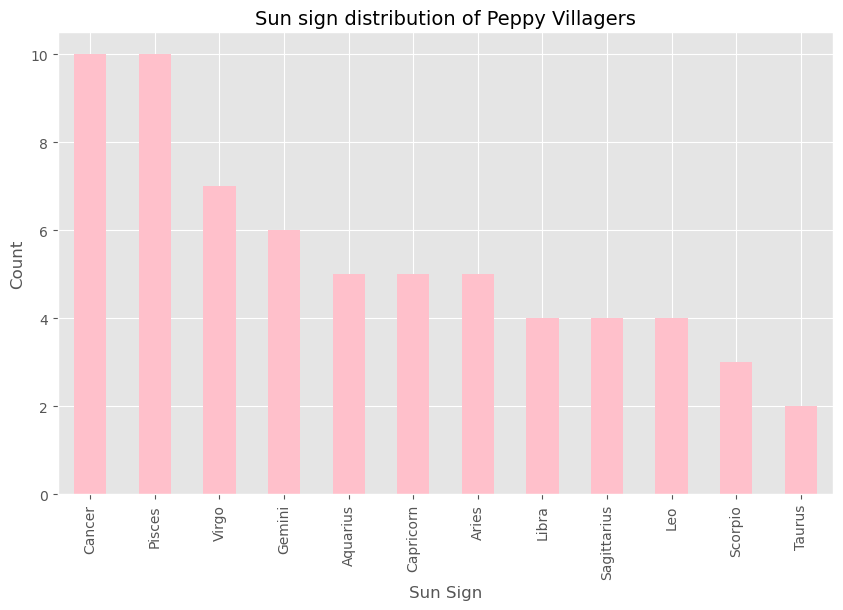

In [106]:
pep_zodiac_counts = peppy['sign'].value_counts()

plt.figure(figsize=(10,6))
pep_zodiac_counts.plot(kind='bar', color='pink')

plt.title('Sun sign distribution of Peppy Villagers', fontsize=14)

plt.xlabel('Sun Sign')
plt.ylabel('Count')
b
plt.xticks(rotation=45)
plt.show()

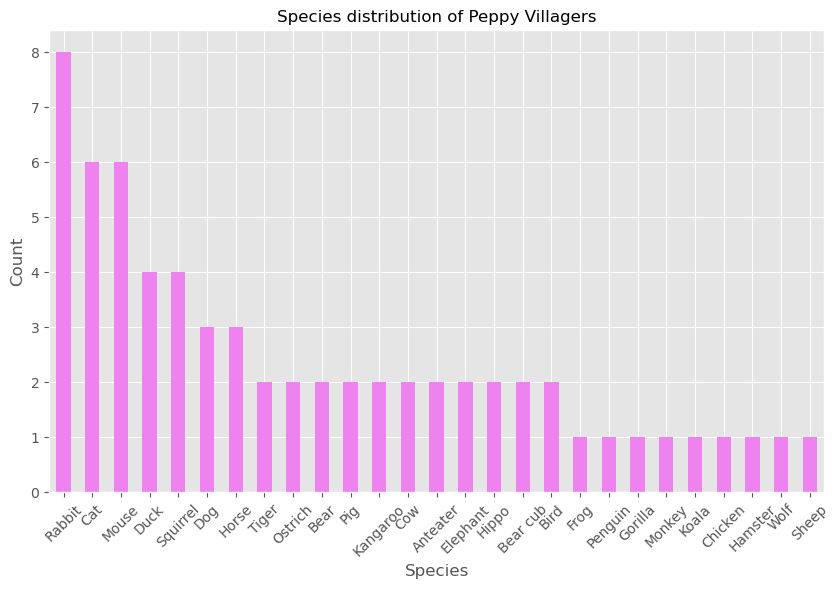

In [107]:
pep_animal_counts = peppy['species'].value_counts()

plt.figure(figsize=(10,6))

pep_animal_counts.plot(kind='bar', color='violet')

plt.title('Species distribution of Peppy Villagers', fontsize=12)

plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

## Star Sign & Personality Correlation Analysis

Two categorical variables -> sign & personality
Want to see if there is any correlation between the two.


One-Hot Encoding - to convert categorical variables into a numerical format
Creates a binary (0 or 1) column in the DF for each unique category in a categorical variable.

Application:

Use pd.get_dummies() from Pandas to do one-hot encoding
To create new binary columns for each unique value in 'sign' and 'personality'.

drop_first=True argument used to avoid MULTICOLLINEARITY by dropping one of the encoded columns for each category to prevent linear dependence between variables.

Resulting DF:

Have a new DF with binary columns representing the absence or presence of each star sign and personality type. 
Eg if villager has sign 'Aries' & personality 'Peppy', corresponding columns in new df will have values sign_Aries:1
personality_Peppy: 1. All other columns will be 0 because villager doesnt have those attributes.


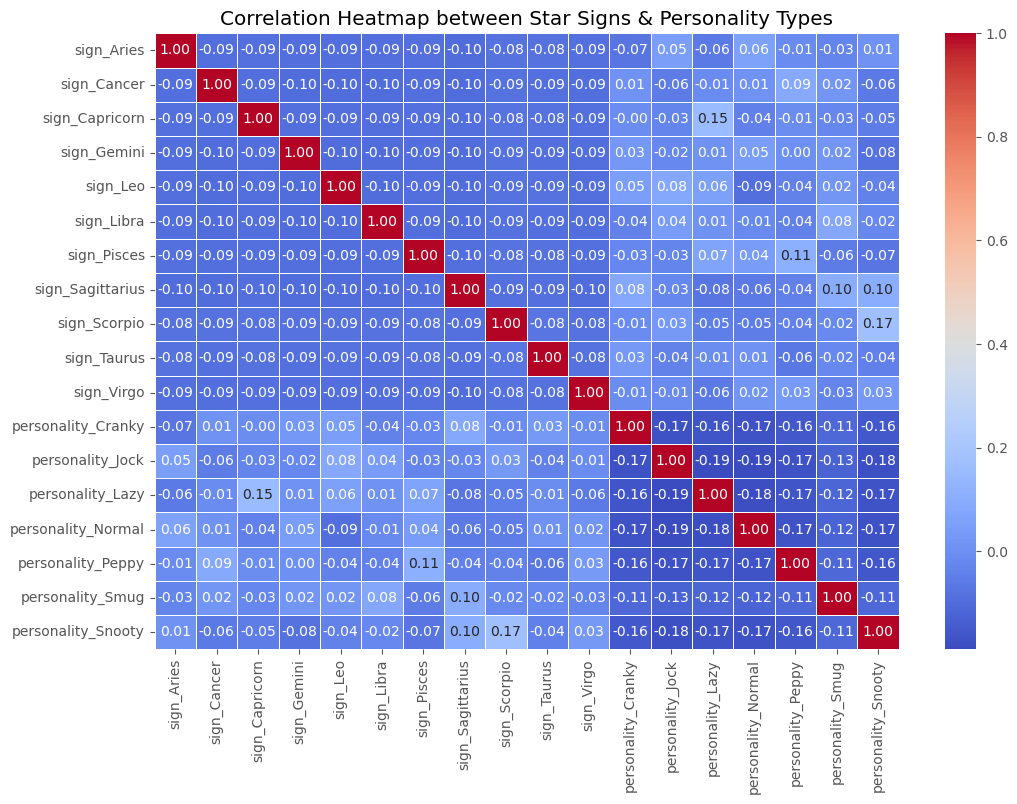

In [108]:
new_encoded = pd.get_dummies(new, columns=['sign', 'personality'], drop_first=True)

#Calculate Correlation

correlation_matrix = new_encoded.corr(numeric_only=True)

#Visualise the Correlation Matrix

import seaborn as sns

plt.figure(figsize=(12,8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

plt.title('Correlation Heatmap between Star Signs & Personality Types')

plt.show()

# Quote Sentiment Analysis

Techniques:
1. VADER(Valence Aware Dictionary and Sentiment Reasoner) - Bag of words approach
2. Roberta Pretrained Model from
3. Huggingface Pipeline

Read in Data and NLTK Basics

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [110]:
new.head()

,name,species,personality,gender,birthday_month,birthday_day,sign,quote,phrase,clothing
0,Ace,Bird,Jock,Male,,,Pisces,,ace,Spade Shirt
1,Admiral,Bird,Cranky,Male,January,27,Aquarius,Only quitters give up.,aye aye,Hanten Jacket
2,Agent S,Squirrel,Peppy,Female,July,2,Cancer,You gotta put the pedal to the metal!,sidekick,No. 2 Shirt
3,Agnes,Pig,Big sister,Female,April,21,Taurus,You reap what you sow.,snuffle,Striped Halter Dress
4,Aisle,Bear cub,Lazy,Male,,,Capricorn,,あーあ,Blue Grid Shirt


In [111]:
emptyQuote = new[new['quote']== ""]
num = len(emptyQuote)
print(num)

72


In [112]:
# drop rows without quotes

new = new[new['quote'] != ""]

# reset index after dropping rows

new.reset_index(drop=True, inplace=True)

new.head()

,name,species,personality,gender,birthday_month,birthday_day,sign,quote,phrase,clothing
0,Admiral,Bird,Cranky,Male,January,27,Aquarius,Only quitters give up.,aye aye,Hanten Jacket
1,Agent S,Squirrel,Peppy,Female,July,2,Cancer,You gotta put the pedal to the metal!,sidekick,No. 2 Shirt
2,Agnes,Pig,Big sister,Female,April,21,Taurus,You reap what you sow.,snuffle,Striped Halter Dress
3,Al,Gorilla,Lazy,Male,October,18,Libra,Life is a buffet. Always go back for seconds.,ayyyeee,Athletic Jacket
4,Alfonso,Alligator,Lazy,Male,June,9,Gemini,Slow and steady wins the race.,it'sa me,Simple Parka


In [113]:
new.shape

(408, 10)

# Basic NLTK

In [114]:
example = new['quote'][50]
print(example)

A snack a day keeps the vacuum away.


In [115]:
tokens = nltk.word_tokenize(example)
tokens

['A', 'snack', 'a', 'day', 'keeps', 'the', 'vacuum', 'away', '.']

In [116]:
tagged = nltk.pos_tag(tokens)  #part of speech tags
tagged

[('A', 'DT'),
 ('snack', 'NN'),
 ('a', 'DT'),
 ('day', 'NN'),
 ('keeps', 'VBZ'),
 ('the', 'DT'),
 ('vacuum', 'NN'),
 ('away', 'RB'),
 ('.', '.')]

In [117]:
import nltk 
nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()  #pretty print

(S A/DT snack/NN a/DT day/NN keeps/VBZ the/DT vacuum/NN away/RB ./.)


[nltk_data] Downloading package words to
[nltk_data]     /Users/vrindajoshi/nltk_data...
[nltk_data]   Package words is already up-to-date!


 # VADER Sentiment Scoring
 Use nltk SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.
 
 This uses a 'bag of words' approach:
 1. stop words are removed
 2. each word is scored and combined to a total score
 
 But doesnt account for relationships between words

In [118]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/vrindajoshi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [119]:
sia.polarity_scores('i am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [120]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [122]:
#run the polarity score on the entire dataset

results = {}

for i, row in tqdm(new.iterrows(), total=len(new)):
    quote = row['quote']
    name = row['name']
    results[name] = sia.polarity_scores(quote)
     

  0%|          | 0/408 [00:00<?, ?it/s]

In [124]:
results

{'Admiral': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'Agent S': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'Agnes': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'Al': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'Alfonso': {'neg': 0.0, 'neu': 0.575, 'pos': 0.425, 'compound': 0.5719},
 'Alice': {'neg': 0.0, 'neu': 0.574, 'pos': 0.426, 'compound': 0.6369},
 'Alli': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'Amelia': {'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.2714},
 'Anabelle': {'neg': 0.275, 'neu': 0.375, 'pos': 0.349, 'compound': 0.1511},
 'Anchovy': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'Angus': {'neg': 0.369, 'neu': 0.238, 'pos': 0.393, 'compound': 0.0516},
 'Anicotti': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'Ankha': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'Annalisa': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'Annalise': {'neg': 0.159, 'neu': 0.

In [138]:
vaders = pd.DataFrame(results).T # T flips it the right way
vaders

,neg,neu,pos,compound
Admiral,0.000,1.000,0.000,0.0000
Agent S,0.000,1.000,0.000,0.0000
Agnes,0.000,1.000,0.000,0.0000
Al,0.000,1.000,0.000,0.0000
Alfonso,0.000,0.575,0.425,0.5719
...,...,...,...,...
Winnie,0.000,0.472,0.528,0.6808
Wolfgang,0.000,1.000,0.000,0.0000
Yuka,0.000,0.648,0.352,0.5859
Zell,0.000,1.000,0.000,0.0000


In [139]:
vaders

,neg,neu,pos,compound
Admiral,0.000,1.000,0.000,0.0000
Agent S,0.000,1.000,0.000,0.0000
Agnes,0.000,1.000,0.000,0.0000
Al,0.000,1.000,0.000,0.0000
Alfonso,0.000,0.575,0.425,0.5719
...,...,...,...,...
Winnie,0.000,0.472,0.528,0.6808
Wolfgang,0.000,1.000,0.000,0.0000
Yuka,0.000,0.648,0.352,0.5859
Zell,0.000,1.000,0.000,0.0000


In [144]:
vaders = new.merge(vaders, left_on='name', right_index=True)
vaders

,name,species,personality,gender,birthday_month,birthday_day,sign,quote,phrase,clothing,neg,neu,pos,compound
0,Admiral,Bird,Cranky,Male,January,27,Aquarius,Only quitters give up.,aye aye,Hanten Jacket,0.000,1.000,0.000,0.0000
1,Agent S,Squirrel,Peppy,Female,July,2,Cancer,You gotta put the pedal to the metal!,sidekick,No. 2 Shirt,0.000,1.000,0.000,0.0000
2,Agnes,Pig,Big sister,Female,April,21,Taurus,You reap what you sow.,snuffle,Striped Halter Dress,0.000,1.000,0.000,0.0000
3,Al,Gorilla,Lazy,Male,October,18,Libra,Life is a buffet. Always go back for seconds.,ayyyeee,Athletic Jacket,0.000,1.000,0.000,0.0000
4,Alfonso,Alligator,Lazy,Male,June,9,Gemini,Slow and steady wins the race.,it'sa me,Simple Parka,0.000,0.575,0.425,0.5719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,Winnie,Horse,Peppy,Female,January,31,Aquarius,"Smile, and the world smiles with you.",hay-OK,Faux-Hair Sweater,0.000,0.472,0.528,0.6808
404,Wolfgang,Wolf,Cranky,Male,November,25,Sagittarius,Don't be afraid to show your fangs.,snarrrl,Flight Jacket,0.000,1.000,0.000,0.0000
405,Yuka,Koala,Snooty,Female,July,20,Cancer,Beauty is in the eye of the beholder.,tsk tsk,Aran-Knit Sweater,0.000,0.648,0.352,0.5859
406,Zell,Deer,Smug,Male,June,7,Gemini,Clothes totally make the mammal.,pronk,Gilet and Shirt,0.000,1.000,0.000,0.0000


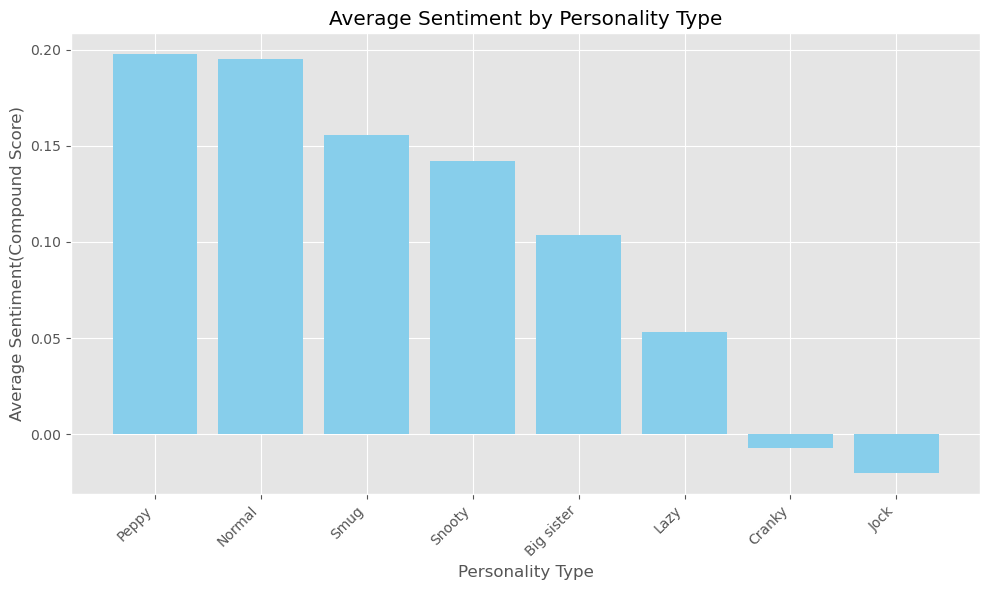

In [145]:
personality_sent = vaders.groupby('personality')['compound'].mean().reset_index()
personality_sent = personality_sent.sort_values(by='compound', ascending=False)

#barchart

plt.figure(figsize=(10,6))

plt.bar(personality_sent['personality'], personality_sent['compound'], color='skyblue')

plt.xlabel('Personality Type')
plt.ylabel('Average Sentiment(Compound Score)')
plt.title('Average Sentiment by Personality Type')

plt.xticks(rotation=45, ha="right")

plt.tight_layout()

In [146]:
import scipy.stats as stats


In [147]:
# Group data by 'personality' and store sentiment scores in separate Series
peppy_sentiment = vaders[vaders['personality'] == 'Peppy']['compound']
other_sentiment = vaders[vaders['personality'] != 'Peppy']['compound']

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(peppy_sentiment, other_sentiment)

# Define significance level
alpha = 0.05

# Check the p-value against the significance level
if p_value < alpha:
    print("The difference in sentiment scores between Peppy villagers and others is statistically significant.")
else:
    print("There is no statistically significant difference in sentiment scores.")


The difference in sentiment scores between Peppy villagers and others is statistically significant.
